In [32]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier

In [37]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}).set_title(title)# font size

    pyplot.show()

## Load Data

In [22]:
with open('data/data_eval_arduino.pkl', 'rb') as f:
    data = pickle.load(f)

In [23]:
X_eval = [d[0] for d in data]
y_eval_ard = [d[1] for d in data]
y_eval = [d[2] for d in data]

## Load Model

In [24]:
with open('models/rf_model.pkl', 'rb') as f:
    model = pickle.load(f)


## Evaluate Peformances

### Arduino

In [46]:
f1_score(y_eval, y_eval_ard, average="weighted")

0.949621528568897

In [47]:
print(classification_report(y_eval, y_eval_ard))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.83      1.00      0.91        20
           2       1.00      0.80      0.89        20
           3       1.00      0.90      0.95        20
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        20

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.95      0.95       120



In [48]:
print(confusion_matrix(y_eval, y_eval_ard))

[[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  4 16  0  0  0]
 [ 0  0  0 18  0  2]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 20]]


### Full Model

In [49]:
y_eval_pred = model.predict(X_eval)

In [50]:
f1_score(y_eval, y_eval_pred, average="weighted")

0.9160550950024634

In [51]:
print(classification_report(y_eval, y_eval_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.76      0.95      0.84        20
           2       0.88      0.70      0.78        20
           3       1.00      0.90      0.95        20
           4       1.00      0.95      0.97        20
           5       0.91      1.00      0.95        20

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [52]:
print(confusion_matrix(y_eval, y_eval_pred))

[[20  0  0  0  0  0]
 [ 0 19  1  0  0  0]
 [ 0  6 14  0  0  0]
 [ 0  0  0 18  0  2]
 [ 0  0  1  0 19  0]
 [ 0  0  0  0  0 20]]


### Confusion Matrix Comparison

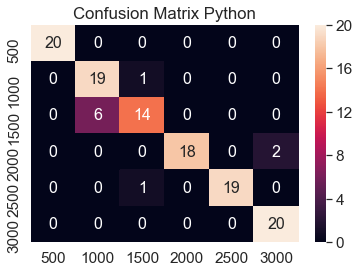

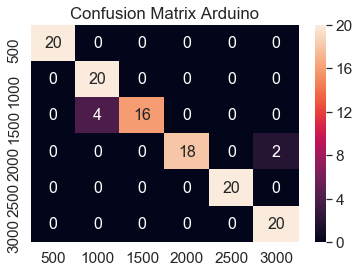

In [53]:
labels = [500* i for i in range(1,7)]

cm_python = confusion_matrix(y_eval, y_eval_pred)
cm_arduino = confusion_matrix(y_eval, y_eval_ard)

printConfusionMatrix(cm_python, labels, "Confusion Matrix Python")
printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")
